<b>Predict Future Sales</b>

###Problem Statement:
Predict total sales for every product and store in the next month

### Overview:
**Objective:** The main objective of this Business Problem is to forecast the total amount of products sold in every shop for next month.

Forecasting sales allows Business Organisations to make business plans and decisions which helps in saving costs and making profits. Businesses can increase supply of products in market according to demand which helps them in increasing the sales of the products. So, Forecasting Sales is very important part of the business. We can solve this business problem by applying various  Machine learning Techniques.



### Data Overview:
Source - https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data

Data Files:
*   **sales_train.csv** - training data set contains daily historical sales data from January 2013 to October 2015.
*   **items.csv** - information about items/products
*   **item_categories.csv** - information about items categories
*   **shops.csv** - information about shops
*   **test.csv** - test dataset. Predict total sales for every item and shop in next month November 2015







### Type of Machine Learning Problem:
This is Regression Problem since we are predicting total sales(numeric value).



### Performance Metrics:


*   Mean Squared Error
*   Mean Absolute Percentage Error



# Exploratory Data Analysis

In [ ]:
#Importing Libraries 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading Data

**Reading Train Sales Data**

In [ ]:
train_sales=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/sales_train.csv")
print("Number of Data Points:",train_sales.shape[0])
print("Number of Features:",train_sales.shape[1])
print("Features:",train_sales.columns.values)
train_sales.head()

Number of Data Points: 2935849
Number of Features: 6
Features: ['date' 'date_block_num' 'shop_id' 'item_id' 'item_price' 'item_cnt_day']


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


**Reading Items Data**

In [ ]:
items=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/items.csv")
print("Number of Data Points:",items.shape[0])
print("Number of Features:",items.shape[1])
print("Features:",items.columns.values)
items.head()

Number of Data Points: 22170
Number of Features: 3
Features: ['item_name' 'item_id' 'item_category_id']


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


**Reading Item Categories Data**

In [ ]:
item_categories=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/item_categories.csv")
print("Number of Data Points:",item_categories.shape[0])
print("Number of Features:",item_categories.shape[1])
print("Features:",item_categories.columns.values)
item_categories.head()

Number of Data Points: 84
Number of Features: 2
Features: ['item_category_name' 'item_category_id']


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


**Reading Shops Data**

In [ ]:
shops=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/shops.csv")
print("Number of Data Points:",shops.shape[0])
print("Number of Features:",shops.shape[1])
print("Features:",shops.columns.values)
shops.head()

Number of Data Points: 60
Number of Features: 2
Features: ['shop_name' 'shop_id']


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


**Reading Test Data**

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/test.csv")
print("Number of Data Points:",test.shape[0])
print("Number of Features:",test.shape[1])
print("Features:",test.columns.values)
test.head()

Number of Data Points: 214200
Number of Features: 3
Features: ['ID' 'shop_id' 'item_id']


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


## Pre-processing Train Sales

**Checking for any missing values in Train Sales Data** 

In [ ]:
train_sales.isnull().sum()/len(train_sales)*100 #checking for percentage of missing values

date              0.0
date_block_num    0.0
shop_id           0.0
item_id           0.0
item_price        0.0
item_cnt_day      0.0
dtype: float64

You can see here all columns in the Train Sales data have 0% missing values.

**Checking for duplicate rows in Train_sales**

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
duplicate_rows = train_sales[train_sales.duplicated()]
duplicate_rows

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


The above dataframe shows rows of train_sales which are repeating more than once.

In [ ]:
train_sales[(train_sales['date']=="05.01.2013") & (train_sales['shop_id']==54) & (train_sales['item_id']==20130)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,05.01.2013,0,54,20130,149.0,1.0
76962,05.01.2013,0,54,20130,149.0,1.0


Here the above 2 rows are same. Need to remove such duplicates shown in duplicate_rows dataframe.

In [ ]:
#deleting duplicates in train_sales
train_sales.drop_duplicates(keep='first',inplace=True)

**Checking for negative values in item_price**

In [ ]:
print((train_sales['item_price']<0).sum())

1


In [ ]:
print(train_sales[train_sales['item_price']<0])

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
484683  15.05.2013               4       32     2973        -1.0           1.0


There is 1 item_price with negative value. we will replace it with median of item_price values.

In [ ]:
median_itemprice=np.median(train_sales["item_price"])
print("Median of item_price:",median_itemprice)

Median of item_price: 399.0


**Replacing negative item price value with median value of item_price**

In [ ]:
train_sales.loc[484683,'item_price']=median_itemprice

In [ ]:
train_sales.loc[484683]

date              15.05.2013
date_block_num             4
shop_id                   32
item_id                 2973
item_price             399.0
item_cnt_day             1.0
Name: 484683, dtype: object

**Checking for Outliers in item_price**

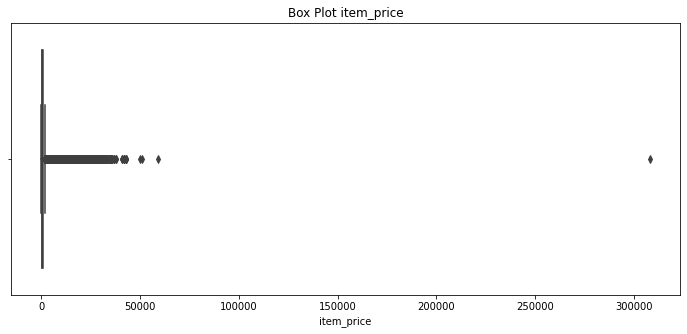

In [ ]:
plt.figure(figsize = (12,5))
sn.boxplot(x="item_price", data=train_sales)
plt.title("Box Plot item_price")
plt.show()

From the above box plot of item_price,the quantile values are not clear. To remove the outliers the threshold value might be around 50000. Have to do further analysis to find the outliers.

**Interquartile Range Method**

In [ ]:
#Item_price Quantile
print("Item_price Quantile:")
print("Min Value:",np.percentile(train_sales["item_price"],0))
print("25th Percentile:",np.percentile(train_sales["item_price"],25))
print("50th Percentile:",np.percentile(train_sales["item_price"],50))
print("75th Percentile:",np.percentile(train_sales["item_price"],75))
print("Max Value:",np.percentile(train_sales["item_price"],100))

Item_price Quantile:
Min Value: 0.07
25th Percentile: 249.0
50th Percentile: 399.0
75th Percentile: 999.0
Max Value: 307980.0


In [ ]:
#upper outlier limit= Q3+ 1.5*IQR =999.0+1.5*750.0 =2124
(train_sales["item_price"]>2124).sum() #Interquartile Range Method

258942

Using Interquartile Range method, found 258942 item_price outlier points out of 2935849 points i.e 8.8 percent of total points. So, this is not the correct outlier threshold value.

In [ ]:
# 90-100 percentile of item_price
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(train_sales["item_price"],90+i))

90 percentile value is 1999.0
91 percentile value is 2090.0
92 percentile value is 2299.0
93 percentile value is 2499.0
94 percentile value is 2599.0
95 percentile value is 2690.0
96 percentile value is 2999.0
97 percentile value is 3190.0
98 percentile value is 3590.0
99 percentile value is 5999.0
100 percentile value is 307980.0


Here there is large difference between 99th percentile and 100th percentile. We will find percentiles between 99-100.

In [ ]:
# 99-100 percentile of item_price
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(train_sales["item_price"],99+(i/100)))

99.1 percentile value is 6999.0
99.2 percentile value is 8649.0
99.3 percentile value is 9990.0
99.4 percentile value is 11490.0
99.5 percentile value is 13490.0
99.6 percentile value is 14490.0
99.7 percentile value is 17990.0
99.8 percentile value is 20990.0
99.9 percentile value is 23990.0
100.0 percentile value is 307980.0


In [ ]:
(train_sales["item_price"]>23990).sum()

2932

In [ ]:
train_sales[train_sales["item_price"]>23990].sort_values(by=['item_price'])[0:10]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2510514,07.03.2015,26,52,13443,23991.0,1.0
2521029,08.03.2015,26,15,13443,23991.0,1.0
2702330,07.06.2015,29,15,6675,23991.0,1.0
2447075,21.02.2015,25,54,6675,23991.0,2.0
2701810,06.06.2015,29,59,6675,23991.0,1.0
2474633,27.02.2015,25,25,13442,23991.0,1.0
2931443,12.10.2015,33,21,12125,23991.0,1.0
2436840,23.02.2015,25,57,13442,23991.0,1.0
2664856,04.06.2015,29,34,6675,23991.0,1.0
2901454,14.10.2015,33,48,12125,23991.0,1.0


There are many item_price points near 23990. So, it is not outlier.

Printing Top 10 values of item_price to analysis values around 50000

In [ ]:
train_sales["item_price"].nlargest(n=10) #top 10 values item_price

1163158    307980.0
885138      59200.0
1488135     50999.0
2327159     49782.0
2885692     42990.0
2910156     42990.0
2917760     42990.0
2931380     42990.0
1006638     42000.0
2893100     41990.0
Name: item_price, dtype: float64

Here there are many points of item_price around 42000 and item_price value 49782 is far from points around 42000. So, considering points >49000 as outliers for item_price.

In [ ]:
(train_sales["item_price"]>49000).sum()

4

Total number of item_price outliers points found is 4.

In [ ]:
train_sales=train_sales[train_sales["item_price"]<49000] # Removing Outliers item_price

**Checking for Outliers in item_cnt_day**

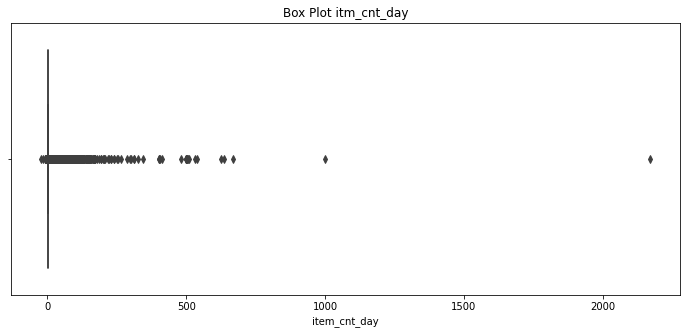

In [ ]:
#Box Plot itm_cnt_day
plt.figure(figsize = (12,5))
sn.boxplot(x="item_cnt_day", data=train_sales)
plt.title("Box Plot itm_cnt_day")
plt.show()

From the above box plot of item_cnt_day, the quantile values are not clear. To remove the outliers the threshold value might be around 500. Have to do further analysis to find the outliers.

**Interquartile Range Method**

In [ ]:
#item_cnt_day Quantile
print("item_cnt_day Quantile:")
print("Min Value:",np.percentile(train_sales["item_cnt_day"],0))
print("25th Percentile:",np.percentile(train_sales["item_cnt_day"],25))
print("50th Percentile:",np.percentile(train_sales["item_cnt_day"],50))
print("75th Percentile:",np.percentile(train_sales["item_cnt_day"],75))
print("Max Value:",np.percentile(train_sales["item_cnt_day"],100))

item_cnt_day Quantile:
Min Value: -22.0
25th Percentile: 1.0
50th Percentile: 1.0
75th Percentile: 1.0
Max Value: 2169.0


Here the quantile Q1 and Q3 Values are same and equal to 1. So Interquartile Range Method doesn't seem to work here to remove ouliers.

In [ ]:
# 90-100 percentile of item_cnt_day
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(train_sales["item_cnt_day"],90+i))

90 percentile value is 2.0
91 percentile value is 2.0
92 percentile value is 2.0
93 percentile value is 2.0
94 percentile value is 2.0
95 percentile value is 2.0
96 percentile value is 2.0
97 percentile value is 3.0
98 percentile value is 3.0
99 percentile value is 5.0
100 percentile value is 2169.0


Here there is large difference between 99th percentile and 100th percentile. We will find percentiles between 99-100.

In [ ]:
# 99-100 percentile of item_cnt_day
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(train_sales["item_cnt_day"],99+(i/100)))

99.1 percentile value is 6.0
99.2 percentile value is 6.0
99.3 percentile value is 7.0
99.4 percentile value is 7.0
99.5 percentile value is 8.0
99.6 percentile value is 10.0
99.7 percentile value is 12.0
99.8 percentile value is 15.0
99.9 percentile value is 22.0
100.0 percentile value is 2169.0


In [ ]:
(train_sales["item_cnt_day"]>22).sum()

2882

In [ ]:
train_sales[train_sales["item_cnt_day"]>22].sort_values(by=['item_cnt_day'])[0:10]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
607684,16.06.2013,5,54,16787,2546.804348,23.0
941196,30.10.2013,9,43,1849,1199.000000,23.0
816005,10.08.2013,7,25,20949,5.000000,23.0
2106983,09.11.2014,22,31,20949,5.000000,23.0
2769128,17.07.2015,30,31,20949,5.000000,23.0
1804046,27.07.2014,18,31,20949,5.000000,23.0
555610,06.06.2013,5,31,20949,5.000000,23.0
1071326,05.11.2013,10,6,2278,1399.000000,23.0
2387356,04.01.2015,24,55,7967,699.000000,23.0
1064456,22.11.2013,10,14,1511,738.130435,23.0


Here there are many item_cnt_day points near 22. So, it is not outlier.

Printing Top 10 values of item_cnt_day to analysis values around 550

In [ ]:
train_sales["item_cnt_day"].nlargest(n=10) #top 10 values item_cnt_day

2909818    2169.0
2326930    1000.0
2864235     669.0
2851091     637.0
2608040     624.0
2626181     539.0
2851073     533.0
2048518     512.0
2067669     508.0
2864260     504.0
Name: item_cnt_day, dtype: float64

Here there are many points of item_cnt_day around 500 and item_cnt_day value 624 is some far from points around 500. So, considering points >550 as outliers for item_cnt_day.

In [ ]:
(train_sales["item_cnt_day"]>550).sum()

5

There are 5 item_cnt_day outlier points >550.

In [ ]:
train_sales=train_sales[train_sales["item_cnt_day"]<550] # Removing Outliers item_cnt_day

In [ ]:
# splitting date to add month and year which will be useful for analysis
train_sales[['date','month','year']]=train_sales["date"].apply(lambda x: x.split('.')).apply(pd.Series)

In [ ]:
train_sales.drop('date', axis=1, inplace=True) #dropping date column

In [ ]:
train_sales.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
0,0,59,22154,999.00,1.0,01,2013
1,0,25,2552,899.00,1.0,01,2013
2,0,25,2552,899.00,-1.0,01,2013
3,0,25,2554,1709.05,1.0,01,2013
4,0,25,2555,1099.00,1.0,01,2013


In [ ]:
train_sales.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/preprocessed_train.csv", index=False)

In [ ]:
train_sales=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/preprocessed_train.csv")

## Pre-processing items

**Checking for any missing values in Items Data**

In [ ]:
items.isnull().sum()/len(items)*100 #checking for percentage of missing values

item_name           0.0
item_id             0.0
item_category_id    0.0
dtype: float64

You can see here all the columns in the Items data have 0% missing values.

**Checking for duplicate rows in Items data**

In [ ]:
duplicate_rows = items[items.duplicated()]
duplicate_rows

,item_name,item_id,item_category_id


There are no duplicate rows in items data.

In [ ]:
!pip3 install googletrans==3.1.0a0

     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 1.3 MB 12.5 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 65 kB 4.0 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=fd7e1b1f86cc7cab625f68ca3c36206f78e9a98a4f1b24e97808f992c83c520b
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
# language translate in python ---> https://pypi.org/project/googletrans/
from googletrans import Translator
translator = Translator()

**translating item_name russian text into english**

In [ ]:
# https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.apply.html
# translating item_name russian text into english
items['item_name']=items['item_name'].apply(lambda x: translator.translate(x).text)

In [ ]:
def text_preprocessing(dframe):
  """funtion for text preprocessing on each column of a dataframe"""
  dframe=dframe.replace('\(','',regex=True)  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
  dframe=dframe.replace('\)','',regex=True)  # replacing symbols '(' ,')' with ''(empty)
  dframe=dframe.replace('\[','',regex=True)  # replacing symbols '[' ,']' with ''(empty)
  dframe=dframe.replace('\]','',regex=True)
  dframe=dframe.replace('!','',regex=True)  # replacing symbols '!',',' with ''(empty)
  dframe=dframe.replace(',','',regex=True)
  dframe=dframe.replace('\*','',regex=True) # replacing symbols '*' with ''(empty)
  dframe=dframe.replace('/','',regex=True)  # replacing symbols '/' with ''(empty)
  dframe=dframe.replace('"','',regex=True)  # replacing symbols '"' with ''(empty)
  dframe=dframe.apply(lambda x:x.strip(" ")) # removing leading and ending spaces of string
  dframe=dframe.replace(' ','_',regex=True) #replacing space with hypen(-) in string

  return dframe

In [ ]:
#text preprocessing item_categories dataset
%%time
items['item_name']=text_preprocessing(items['item_name'])

CPU times: user 380 ms, sys: 3.75 ms, total: 384 ms
Wall time: 390 ms


In [ ]:
items.head()

,item_name,item_id,item_category_id
0,IN_THE_POWER_OF_GLAMOR_PLAST._D,0,40
1,ABBYY_FineReader_12_Professional_Edition_Full_...,1,76
2,IN_THE_RAYS_OF_GLORY_UNV_D,2,40
3,BLUE_WAVE_Univ_D,3,40
4,BOX_GLASS_D,4,40


In [ ]:
items.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/preprocessed_items.csv", index=False)

In [ ]:
items=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/preprocessed_items.csv")

## Pre-processing item categories

**Checking for duplicate rows in item_categories data**

In [ ]:
duplicate_rows = item_categories[item_categories.duplicated()]
duplicate_rows

,item_category_name,item_category_id


There are no duplicate rows in item categories data

**translating item_category_name russian text into english**

In [ ]:
# translating item_category_name russian text into english
item_categories['item_category_name']=item_categories['item_category_name'].apply(lambda x: translator.translate(x).text)
item_categories.head()

,item_category_name,item_category_id
0,PC - Headsets/Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


<b>Splitting item_category_name column into category and subcategory</b>

In [ ]:
items_category_split=item_categories['item_category_name'].apply(lambda x: pd.Series(x.split('-',1)))
item_categories['item_category']=items_category_split[0]           # splitting item_category_name into 2 columns item_category
item_categories['item_sub_category']=items_category_split[1]       # and item_sub_category

**checking for any missing values in items_categories Data**

In [ ]:
item_categories.isnull().sum()/len(item_categories)*100 #checking for percentage of missing values

item_category_name    0.000000
item_category_id      0.000000
item_category         0.000000
item_sub_category     8.333333
dtype: float64

You can see here after spltting item_category_name column, item_sub_category column in item_categories data has 8.33% missing values and the remaining columns have 0% missing values.

In [ ]:
item_categories[item_categories.isnull().any(axis=1)] # printing the null value rows

,item_category_name,item_category_id,item_category,item_sub_category
8,Tickets (Digital),8,Tickets (Digital),NaN
9,Delivery of goods,9,Delivery of goods,NaN
32,"Payment cards (Movie, Music, Games)",32,"Payment cards (Movie, Music, Games)",NaN
79,Service,79,Service,NaN
81,Pure media (spire),81,Pure media (spire),NaN
82,Blank media (piece),82,Blank media (piece),NaN
83,Batteries,83,Batteries,NaN


**Filling Missing Values in item_sub_category**

In [ ]:
#filling Missing Values in item_sub_category by splitting item_category

# 'Payment cards (Movie, Music, Games)'
item_categories.loc[32,['item_category']]='Payment cards'
item_categories.loc[32,['item_sub_category']]='Movie, Music, Games'

# 'Pure media (spire)'
item_categories.loc[81,['item_category']]='Pure media'
item_categories.loc[81,['item_sub_category']]='spire'

# 'Blank media (piece)'
item_categories.loc[82,['item_category']]='Blank media'
item_categories.loc[82,['item_sub_category']]='piece'

In [ ]:
# filling null values in column item_sub_category with values in item_category_column
item_categories['item_sub_category']=item_categories['item_sub_category'].fillna(item_categories['item_category']) 

In [ ]:
item_categories.drop('item_category_name', axis=1, inplace=True) #dropping item_category_name column

In [ ]:
#text preprocessing item_categories dataset
%%time
item_categories['item_category']=text_preprocessing(item_categories['item_category'])
item_categories['item_sub_category']=text_preprocessing(item_categories['item_sub_category'])

CPU times: user 3.84 ms, sys: 0 ns, total: 3.84 ms
Wall time: 4.4 ms


In [ ]:
item_categories

,item_category_id,item_category,item_sub_category
0,0,PC,Headsets/Headphones
1,1,Accessories,PS2
2,2,Accessories,PS3
3,3,Accessories,PS4
4,4,Accessories,PSP
...,...,...,...
79,79,Service,Service
80,80,Service,Tickets
81,81,Pure_media,spire
82,82,Blank_media,piece


In [ ]:
item_categories.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/preprocessed_item_categories.csv", index=False)

In [ ]:
item_categories=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/preprocessed_item_categories.csv")

## Pre-processing shops

**translating shop_name russian text into english**

In [ ]:
# translating shop_name russian text into english
shops['shop_name']=shops['shop_name'].apply(lambda x: translator.translate(x).text)

In [ ]:
shops.head()

,shop_name,shop_id
0,"!Yakutsk Ordzhonikidze, 56 francs",0
1,"!Yakutsk shopping center ""Central"" franc",1
2,"Adygea shopping center ""Mega""",2
3,"Balashikha SEC ""October-Kinomir""",3
4,"Volzhsky shopping center ""Volga Mall""",4


**Removing Duplicate Shop Names in Shops data**

In [ ]:
# printing shop_id 10,11
print(shops["shop_name"][10])
print(shops["shop_name"][11])

Zhukovsky st. Chkalova 39m?
Zhukovsky st. Chkalova 39m²


Shop_ID 10 and 11 have same shop name. So we will remove shop id 11 in shops data and replace shop_id 11 with 10 in train_sales data

In [ ]:
shops.drop(11,axis=0,inplace=True)      #removing shop_id 11 in shops data

In [ ]:
train_sales['shop_id']= train_sales['shop_id'].replace(11,10) #replacing shop_id 11 with 10 in train_sales

<b>splitting shop_name column into shop_city and shop_category</b>

In [ ]:
shop_name_split=shops['shop_name'].apply(lambda x: pd.Series(x.split(' ',1)))
shops['shop_city']=shop_name_split[0]           # splitting shop_name into 2 columns shop_city
shops['shop_category']=shop_name_split[1]       # and shop_category

**checking for any missing values in Shops Data**

In [ ]:
shops.isnull().sum()/len(shops)*100 #checking for percentage of missing values

shop_name        0.0
shop_id          0.0
shop_city        0.0
shop_category    0.0
dtype: float64

You can see here all columns in Shops data have 0% missing values after splitting shop_name

**Modifying some of the shop_city and shop_category values**

In [ ]:
#filling errors - modifying some of the shop_city and shop_category values
shops.loc[9,['shop_city']]='Voronezh'
shops.loc[9,['shop_category']]='Outbound Trade'

shops.loc[12,['shop_city']]='Online'
shops.loc[12,['shop_category']]='E-shop	online'

shops.loc[42,['shop_city']]='St. Petersburg'
shops.loc[42,['shop_category']]='TC "Nevsky Center"'

shops.loc[43,['shop_city']]='St. Petersburg'
shops.loc[43,['shop_category']]='TC "Sennaya"'

shops.loc[46,['shop_city']]='Sergiev Posad'
shops.loc[46,['shop_category']]='Shopping Center "7Ya"'

shops.loc[55,['shop_city']]='Online'
shops.loc[55,['shop_category']]='Digital warehouse 1C-Online'

shops.loc[0,['shop_city']]='Yakutsk'
shops.loc[1,['shop_city']]='Yakutsk'

In [ ]:
shops.drop('shop_name',axis=1, inplace=True) #dropping shop_name column

In [ ]:
#text preprocessing shop_category - shops dataset
%%time
shops['shop_category']=text_preprocessing(shops['shop_category'])

CPU times: user 7.35 ms, sys: 61 µs, total: 7.41 ms
Wall time: 25.9 ms


In [ ]:
shops

,shop_id,shop_city,shop_category
0,0,Yakutsk,Ordzhonikidze_56_francs
1,1,Yakutsk,shopping_center_Central_franc
2,2,Adygea,shopping_center_Mega
3,3,Balashikha,SEC_October-Kinomir
4,4,Volzhsky,shopping_center_Volga_Mall
5,5,Vologda,SEC_Marmalade
6,6,Voronezh,Plekhanovskaya_13
7,7,Voronezh,TRC_Maksimir
8,8,Voronezh,TRC_City-Park_City
9,9,Voronezh,Outbound_Trade


In [ ]:
shops.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/preprocessed_shops.csv", index=False)

In [ ]:
shops=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/preprocessed_shops.csv")

**Merging all preprocessed data train_sales,shops,items,item_categories**

In [ ]:
#merging all  preprocessed data train_sales,shops,items,item_categories
preprocessed_data=train_sales.merge(shops)
preprocessed_data=preprocessed_data.merge(items)
preprocessed_data=preprocessed_data.merge(item_categories)

In [ ]:
preprocessed_data.drop('item_name', axis=1, inplace=True) #dropping item_name column
preprocessed_data.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,shop_city,shop_category,item_category_id,item_category,item_sub_category
0,0,59,22154,999.0,1.0,1,2013,Yaroslavl,shopping_center_Altair,37,Movie,Blu-Ray
1,0,25,22154,999.0,1.0,1,2013,Moscow,TRK_Atrium,37,Movie,Blu-Ray
2,0,25,22154,999.0,1.0,1,2013,Moscow,TRK_Atrium,37,Movie,Blu-Ray
3,0,25,22154,999.0,1.0,1,2013,Moscow,TRK_Atrium,37,Movie,Blu-Ray
4,0,25,22154,999.0,1.0,1,2013,Moscow,TRK_Atrium,37,Movie,Blu-Ray


**Correlation Between various Features**

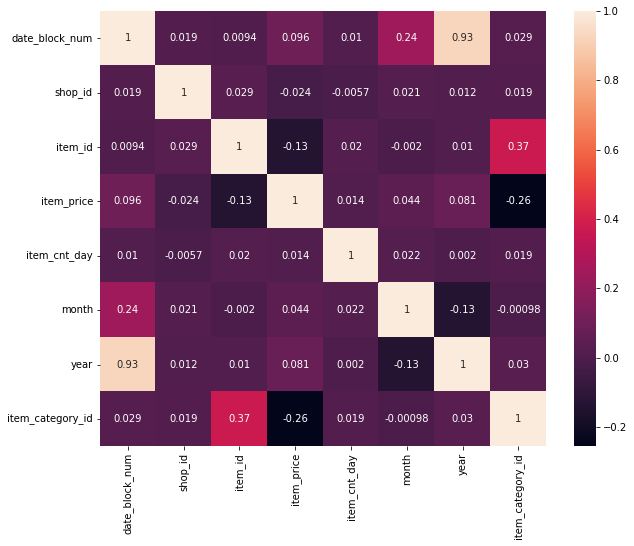

In [ ]:
corr = preprocessed_data.corr()
plt.figure(figsize = (10,8))
sn.heatmap(corr,annot=True)
plt.show()

From the above Heatmap, The correlation between many various features is less. But date_block_num and year have high correlation-0.93

**Bar Plot of date_block_num and Sales from January 2013 to September 2015**

In [ ]:
monthly_sales=pd.DataFrame(train_sales.groupby("date_block_num")["item_cnt_day"].apply(np.sum)).reset_index()
monthly_sales.columns=['date_block_num','item_cnt_month']

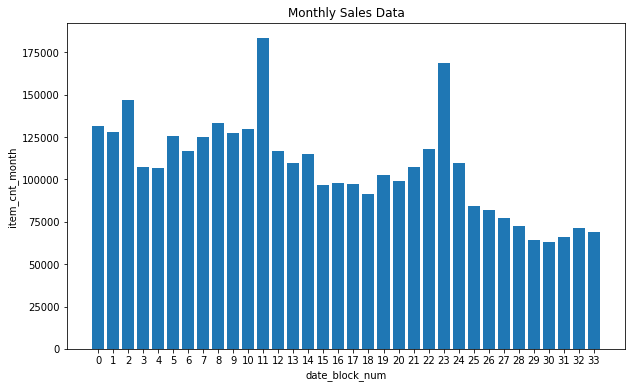

In [ ]:
# https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.bar.html
plt.figure(figsize = (10,6))
plt.bar(monthly_sales['date_block_num'],monthly_sales['item_cnt_month'],width=0.8,tick_label=monthly_sales['date_block_num'])
plt.xlabel("date_block_num")
plt.ylabel("item_cnt_month")
plt.title("Monthly Sales Data")
plt.show()

From the above Bar Plot there is spike in sales at 11th and 23rd date_block_num. Every sales for each date_block_num are very near to 1 Lakh and few are greater than 1 lakh. But sales at last date_block_nums seem to be low compared to previous values.

**Line Plot of date_block_num and Sales from January 2013 to September 2015**

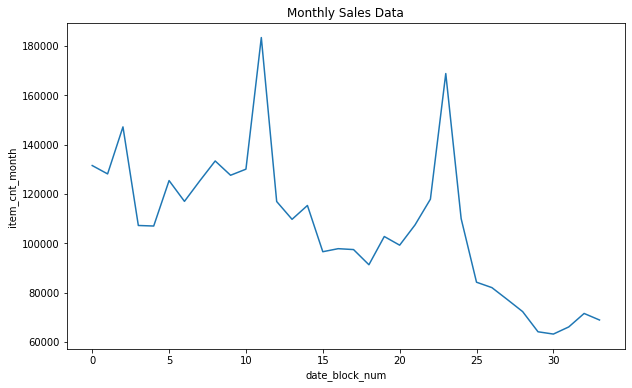

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(monthly_sales['date_block_num'],monthly_sales['item_cnt_month'])
plt.xlabel("date_block_num")
plt.ylabel("item_cnt_month")
plt.title("Monthly Sales Data")
plt.show()

There is a decreasing trend in the sales of each month. There is also spike in sales data indicating seasonality and the data is not stationary.

**Scatter Plot with ColourCoding for shop_id and item_cnt_month**

In [ ]:
shop_monthly_sales=pd.DataFrame(train_sales.groupby(["date_block_num","shop_id"])["item_cnt_day"].apply(np.sum)).reset_index()
shop_monthly_sales.columns=['date_block_num','shop_id','item_cnt_month']

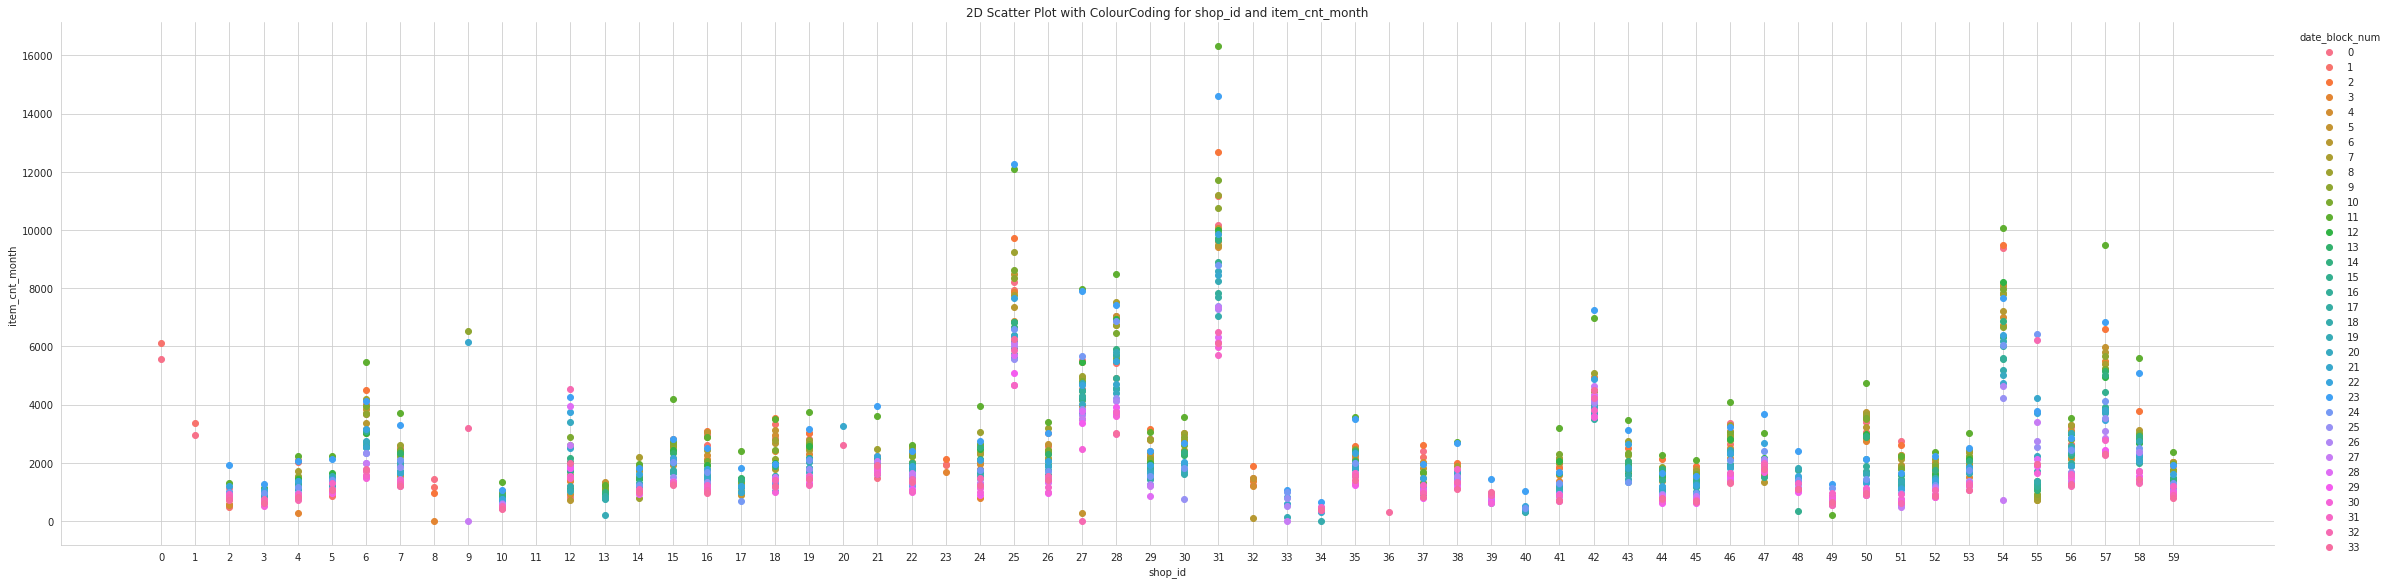

In [ ]:
#2D Scatter plot with Colourcoding
sn.set_style("whitegrid")
sn.FacetGrid(shop_monthly_sales,hue="date_block_num",height=8,aspect=4)\
.map(plt.scatter,"shop_id","item_cnt_month")\
.add_legend();

plt.xticks(range(60))
plt.title("2D Scatter Plot with ColourCoding for shop_id and item_cnt_month")
plt.show();

shopid 31 has highest monthly sales and it seems like almost in every month shopid 31 has high monthly sales. There are some shopids with sales only in few months like shopid 0,1,20 have 2 months sales only. shopid 36 have sales in 1 month only. So, some shopids doen't have sales in few date_block_num.

In [ ]:
shop_monthly_sales.loc[shop_monthly_sales.groupby(["date_block_num"])["item_cnt_month"].idxmax()]

,date_block_num,shop_id,item_cnt_month
26,0,31,10173.0
72,1,31,11160.0
116,2,31,12670.0
162,3,31,9621.0
206,4,31,9423.0
252,5,31,10072.0
298,6,31,9500.0
344,7,31,9882.0
389,8,31,11204.0
435,9,31,10754.0


From the above dataframe, shop_id 31 has maximum sales in all months except the last month(33 date_block_num)

**2D Scatter Plot with ColourCoding for item_id and item_cnt_month**

In [ ]:
item_monthly_sales=pd.DataFrame(train_sales.groupby(["date_block_num","item_id"])["item_cnt_day"].apply(np.sum)).reset_index()
item_monthly_sales.columns=["date_block_num","item_id","item_cnt_month"]

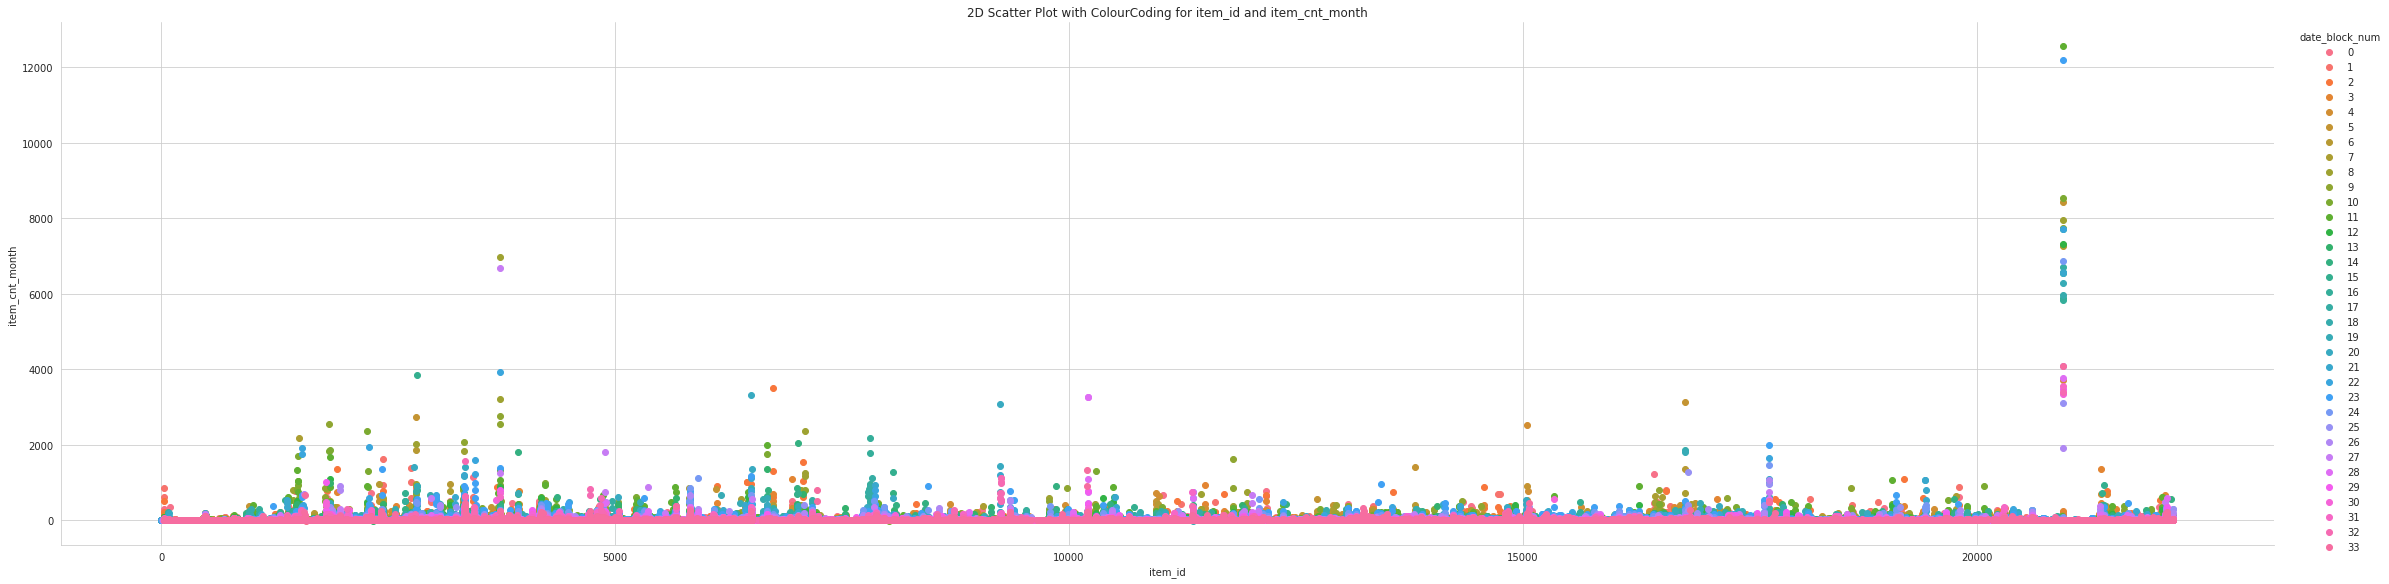

In [ ]:
#2D Scatter plot with Colourcoding
sn.set_style("whitegrid")
sn.FacetGrid(item_monthly_sales,hue="date_block_num",height=8,aspect=4)\
.map(plt.scatter,"item_id","item_cnt_month")\
.add_legend();

plt.title("2D Scatter Plot with ColourCoding for item_id and item_cnt_month")
plt.show();

From the above scatter plot, items monthly sales maximum lie below 1000. But there is one particular item which has sales more than 2000 and up to 12000 in every month.

In [ ]:
item_monthly_sales.loc[item_monthly_sales.groupby(["date_block_num"])["item_cnt_month"].idxmax()]

,date_block_num,item_id,item_cnt_month
6009,0,16450,1226.0
8832,1,2445,1611.0
18479,2,6738,3504.0
32380,3,21376,1368.0
40683,4,20949,3727.0
49152,5,20949,8424.0
57569,6,20949,7269.0
65627,7,20949,7296.0
73513,8,20949,7945.0
81419,9,20949,7738.0


The above dataframe shows the item_id which has max sales in each date_block_month. You can see item_id 20949 has max sales in 29 out of 34 months(date_block_nums).

**PDF and Histogram of monthly sales of every shop-item pair**

In [ ]:
date_shop_item_sales=pd.DataFrame(train_sales.groupby(["date_block_num","shop_id","item_id"])["item_cnt_day"].apply(np.sum))

<Figure size 720x432 with 0 Axes>

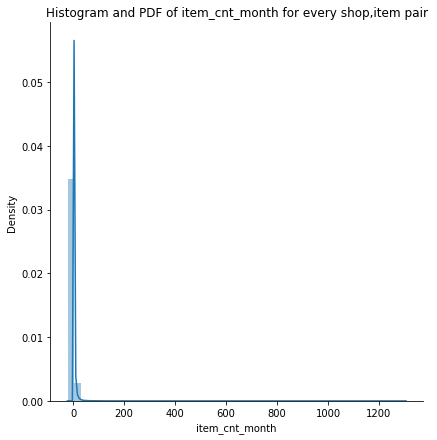

In [ ]:
plt.figure(figsize = (10,6))
sn.FacetGrid(date_shop_item_sales,height=6)\
.map(sn.distplot,"item_cnt_day")\
.add_legend();
plt.xlabel("item_cnt_month")
plt.title("Histogram and PDF of item_cnt_month for every shop,item pair")
plt.show();

From the above PDF and Histogram, many shop-item pairs have less than 50 monthly sales and there are very few shop-item pairs have more monthly sales(>50).

**Scatter Plot between item_price and item_cnt_month**

In [ ]:
date_itemprice_sales=pd.DataFrame(train_sales.groupby(["date_block_num","item_price"])["item_cnt_day"].apply(np.sum)).reset_index(level=1)
date_itemprice_sales.columns=["item_price","item_cnt_month"]

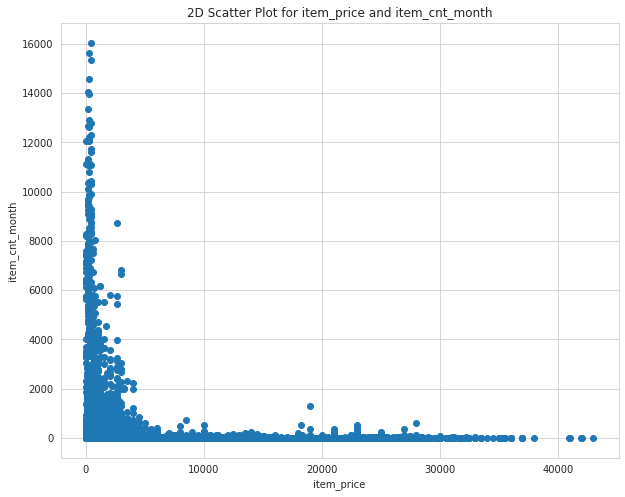

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(x=date_itemprice_sales["item_price"], y=date_itemprice_sales["item_cnt_month"]);
plt.title("2D Scatter Plot for item_price and item_cnt_month")
plt.xlabel("item_price")
plt.ylabel("item_cnt_month")
plt.show()

From the above scatter plot, the total monthly sales are high for lower prices (around<2000). Total monthly sales are decreasing and less from prices around 5000.

**Bar Plot - Year wise each Month sales**

In [ ]:
year_monthly_sales=pd.DataFrame(preprocessed_data.groupby(["year","month"])["item_cnt_day"].apply(np.sum)).reset_index()
year_monthly_sales.columns=['year','month','item_cnt_month']

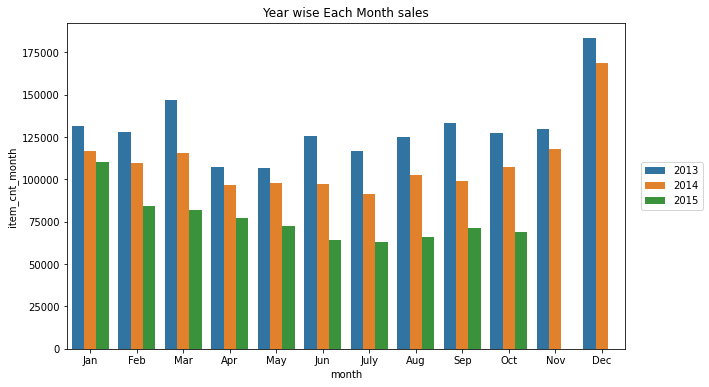

In [ ]:
plt.figure(figsize = (10,6))
sn.barplot(x='month', y='item_cnt_month', data=year_monthly_sales, hue='year')
plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left")
plt.title('Year wise Each Month sales')
mon=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
plt.xticks(range(12),mon)
plt.ylabel('item_cnt_month')
plt.show()

From the above Bar plot, there is decrease in sales in each month from year 2013 to 2015.In December month there is spike in sales, has high sales in years 2013 and 2014.

**2D Scatter plot between shop_city and item_cnt_month**

In [ ]:
shopcity_monthly_sales=pd.DataFrame(preprocessed_data.groupby(["date_block_num","shop_city"])["item_cnt_day"].apply(np.sum)).reset_index()
shopcity_monthly_sales.columns=["date_block_num","shop_city","item_cnt_month"]

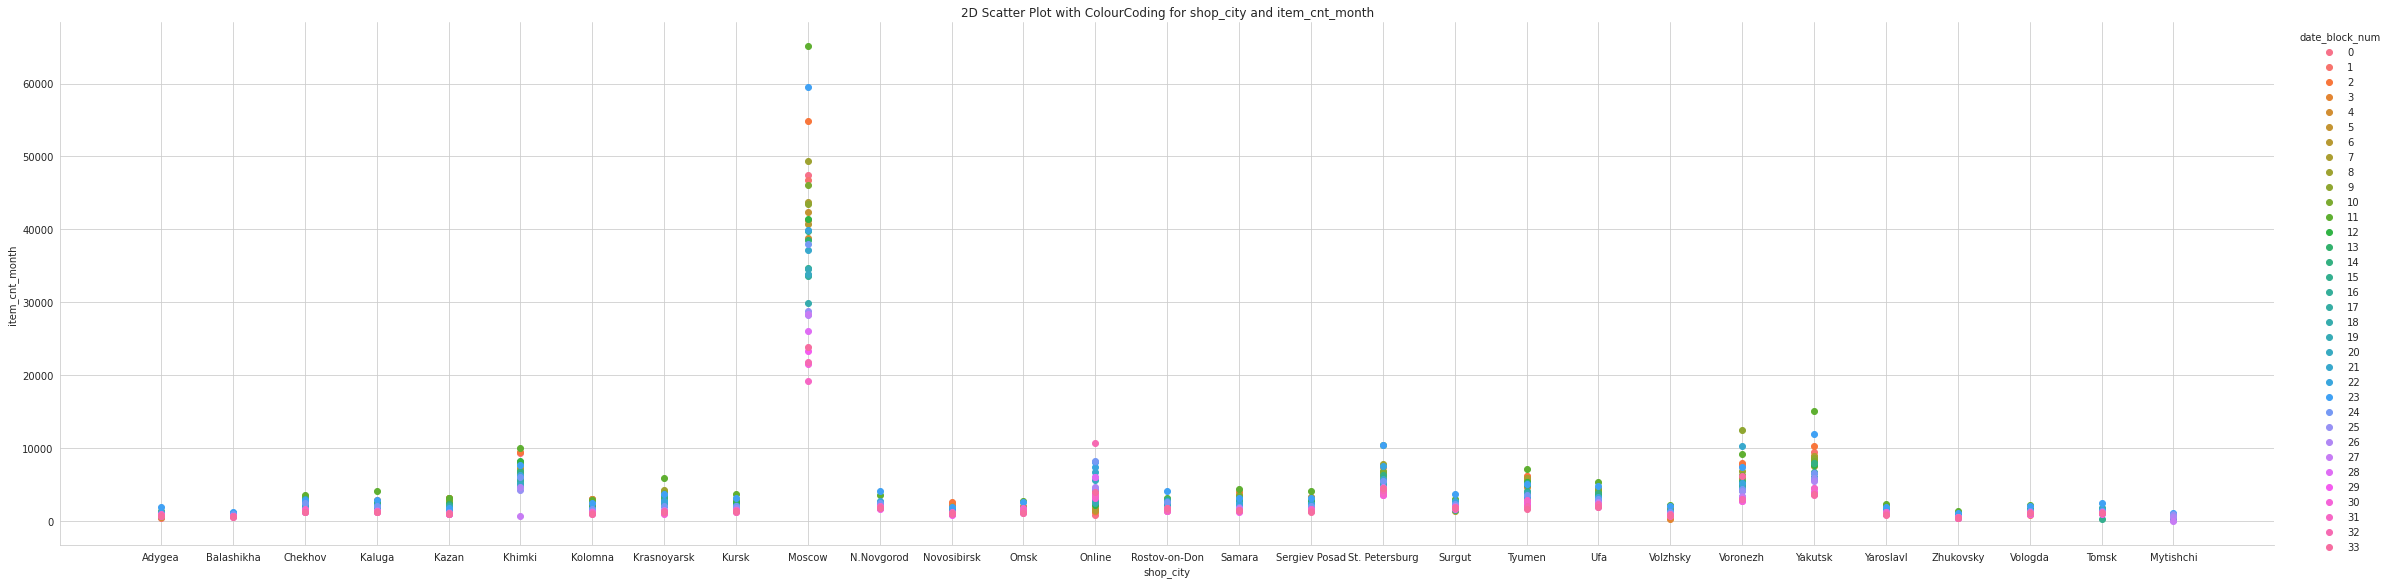

In [ ]:
#2D Scatter plot with Colourcoding
sn.set_style("whitegrid")
sn.FacetGrid(shopcity_monthly_sales,hue="date_block_num",height=8,aspect=4)\
.map(plt.scatter,"shop_city","item_cnt_month")\
.add_legend();

plt.title("2D Scatter Plot with ColourCoding for shop_city and item_cnt_month")
plt.show();

All shop_cities have monthly sales in between 0 to 10000 But Moscow city has high sales greater than 20000. Moscow city has high sales in all months. Some cities doesn't have sales in all months.

**2D Scatter Plot with ColourCoding for item_category_id and item_cnt_month**

In [ ]:
item_categoryid_sales=pd.DataFrame(preprocessed_data.groupby(["date_block_num","item_category_id"])["item_cnt_day"].apply(np.sum)).reset_index()
item_categoryid_sales.columns=["date_block_num","item_category_id","item_cnt_month"]

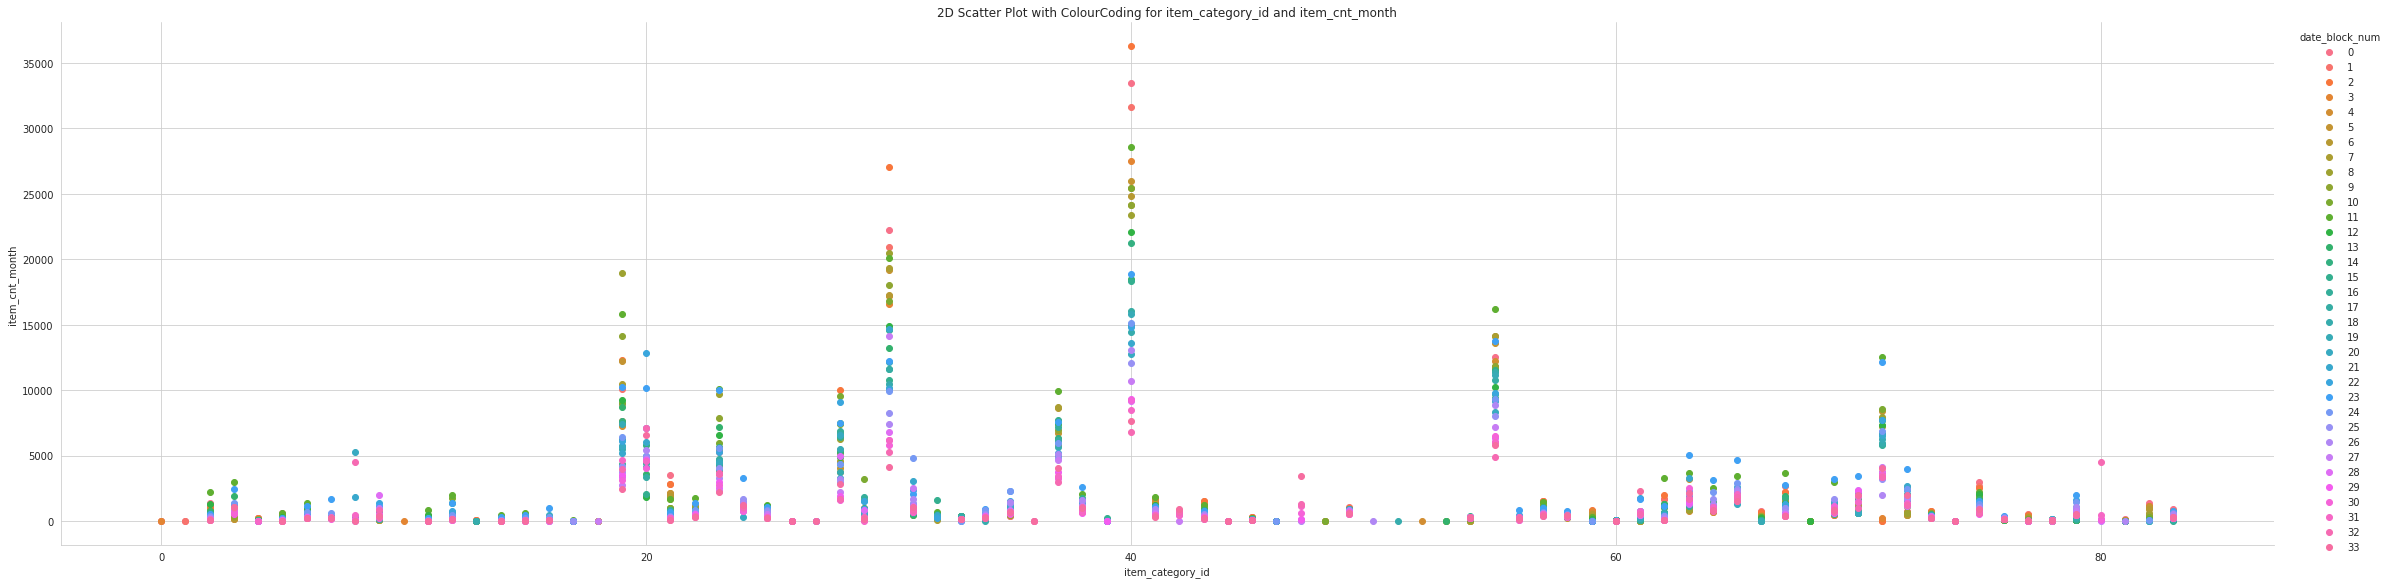

In [ ]:
#2D Scatter plot with Colourcoding
sn.set_style("whitegrid")
sn.FacetGrid(item_categoryid_sales,hue="date_block_num",height=8,aspect=4)\
.map(plt.scatter,"item_category_id","item_cnt_month")\
.add_legend();

plt.title("2D Scatter Plot with ColourCoding for item_category_id and item_cnt_month")
plt.show();

Maximum item_category_id s have monthly sales below 5000. Item_category_id 40 have maximum sales in almost all months. Some item_category_id s doen't have sales in some months.

In [ ]:
item_categoryid_sales.loc[item_categoryid_sales.groupby(["date_block_num"])["item_cnt_month"].idxmax()]

,date_block_num,item_category_id,item_cnt_month
25,0,40,33488.0
81,1,40,31649.0
136,2,40,36277.0
190,3,40,27525.0
243,4,40,25470.0
303,5,40,25992.0
361,6,40,24806.0
421,7,40,24130.0
480,8,40,23348.0
539,9,40,24173.0


From the above data frame you can see item_category_id 40 has maximum sales in all months except one month(date_block_num_32)

**2D Scatter Plot with ColourCoding for item_category and item_cnt_month**

In [ ]:
item_category_sales=pd.DataFrame(preprocessed_data.groupby(["date_block_num","item_category"])["item_cnt_day"].apply(np.sum)).reset_index()
item_category_sales.columns=["date_block_num","item_category","item_cnt_month"]

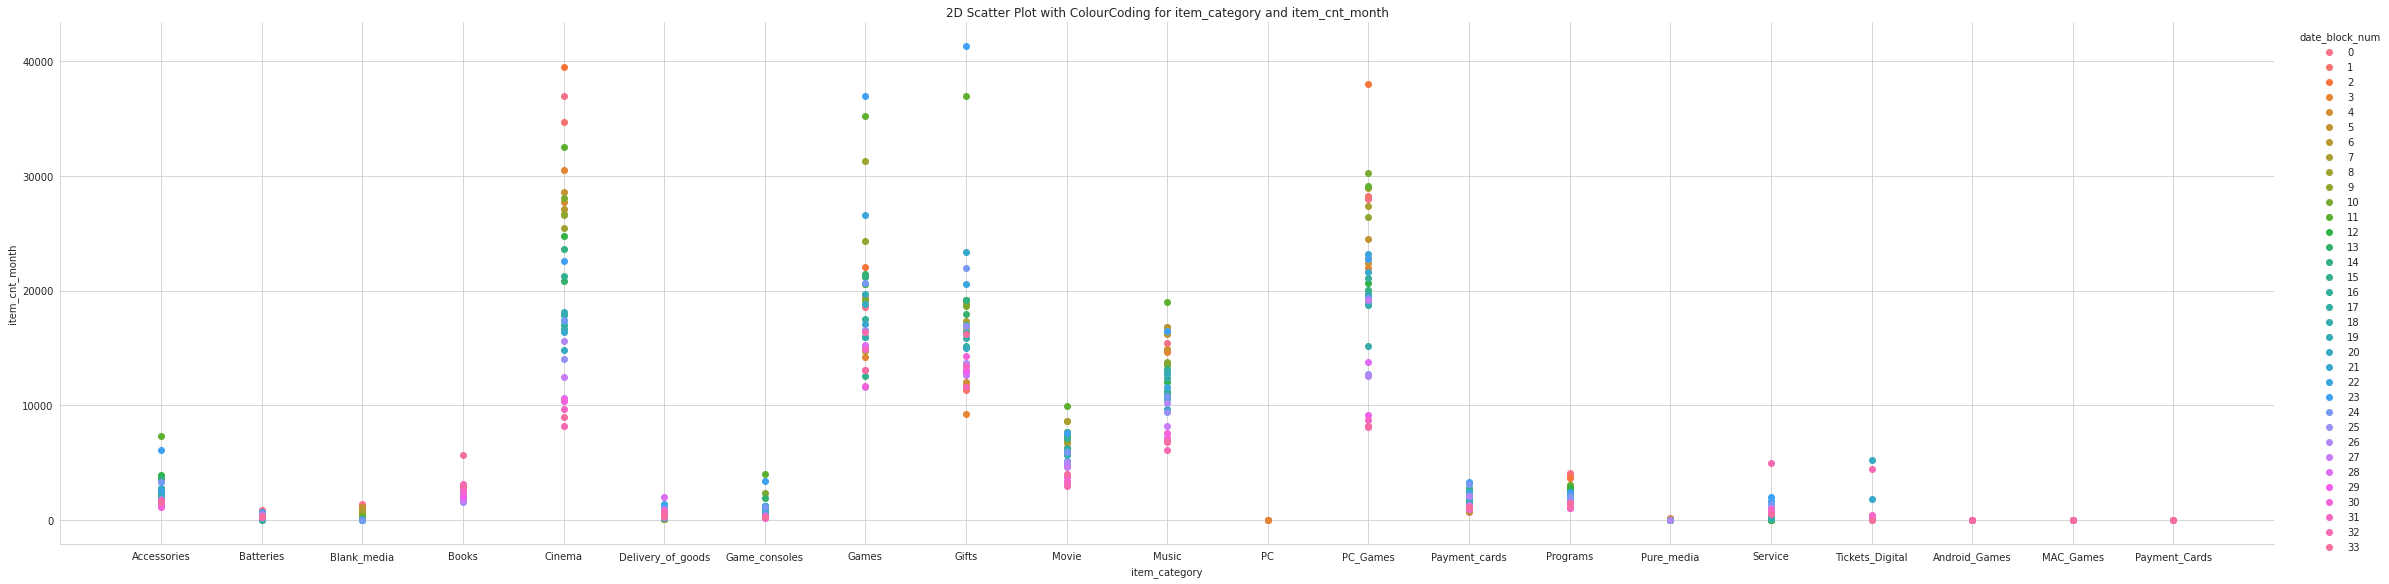

In [ ]:
#2D Scatter plot with Colourcoding
sn.set_style("whitegrid")
sn.FacetGrid(item_category_sales,hue="date_block_num",height=8,aspect=4)\
.map(plt.scatter,"item_category","item_cnt_month")\
.add_legend();

plt.title("2D Scatter Plot with ColourCoding for item_category and item_cnt_month")
plt.show();

Some item_categories like Cinema, Games, Gifts,PC Games have high sales and have sales in all months. Some item_categories doen't have sales in all months.

In [ ]:
item_category_sales.loc[item_category_sales.groupby(["date_block_num"])["item_cnt_month"].idxmax()]

,date_block_num,item_category,item_cnt_month
4,0,Cinema,36907.0
21,1,Cinema,34694.0
38,2,Cinema,39434.0
54,3,Cinema,30527.0
71,4,Cinema,27706.0
87,5,Cinema,28617.0
103,6,Cinema,27087.0
126,7,PC_Games,27374.0
138,8,Games,31323.0
151,9,Cinema,26547.0


From the above dataframe, item_category cinema has maximum sales in 13 months, Gifts in 8 months, Games in 7 months,PC_Games in 6 months.

As this is a Regression Time Series Problem, We can use Root Mean Squared Error and Mean Absolute Percentage Error.Using Percentage Error will be useful because it give percentage difference between actual and predicted value.